# Best First Search

Best first search is an informed (heuristic) search, that decides which path to transverse based on a greedy choice of which of the adjacent nodes is the most promising i.e., closest to the destination. To do so it makes use of a priotity queue with node distances. For this algorithm, alongside the a star algorithm, we make use of manhattan distance. 

Best first search algorithm with manhattan distance heuristic only, does not consider coin value, only fastest position to the end.

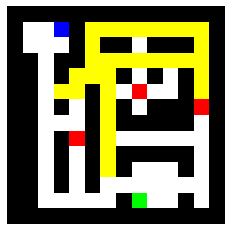

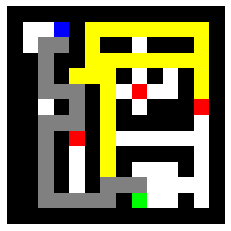

In [2]:
from pac_man.search import best_first_graph_search, uniform_cost_search
from pac_man.pacman_problem import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

maze = generator.MAZE_14

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)

heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h(node, goal, maze)  

root = best_first_graph_search(problem,heuristic)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

Best first search, unlike a star, is not an optimal algorithm, and path from start to finish might not be as great as a star. Both however are quite similiar, with the main difference being the evaluation function to decide shortest path, a star makes use of f(n) = g(n) + h(n), while bfs in the greedy form makes use of f(n) = h(n), where h(n) is the heuristic function and g(n) is the distance from the start position to the adjacent positions. However a star does make more use of memory than greedy bfs as a counter exchange.

Modifying the heuristic to consider coin weights instead of simply distances changes the outcome behaviour to collect the coins and minimize distance. The outcome is the same as a star algorithm. Note: the chosen heuristic will still attempt to minimize distance over coin collection, the inverse is not valid.

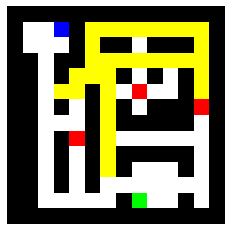

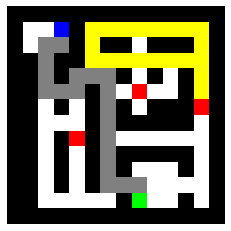

In [3]:
from pac_man.search import best_first_graph_search, uniform_cost_search
from pac_man.pacman_problem import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_14
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)

heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h(node, goal, maze)

root = best_first_graph_search(problem,heuristic)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

Below is the comparison of 3 heuristics, one considering simply positions, and the other two consider coin cost. Note than when coin cost is taken into account, the algorithm will deviate the path to maximize coin collection.

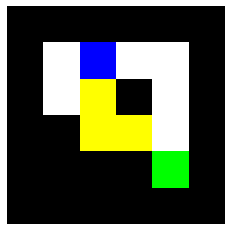

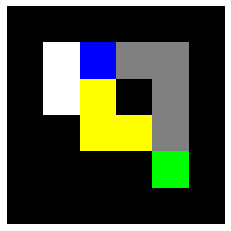

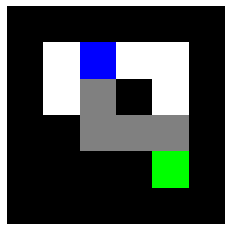

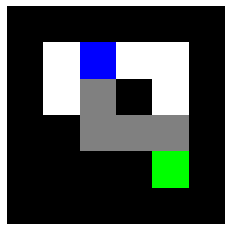

In [4]:
from pac_man.search import best_first_graph_search, uniform_cost_search
from pac_man.pacman_problem import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

def h_1(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-1
    return d

def h_2(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_simple_coin
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_1(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_2(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

Below is the same comparison as above, however in a larger maze. The main difference from greedy bfs to a star is that a star found a more optimal path from start to finish no matter which heuristic. And also, the optimal solution found in a star, was also the same with coin collection consideration, while greedy bfs had a to perform a minor deviation to collect coin and possess same path outcome.

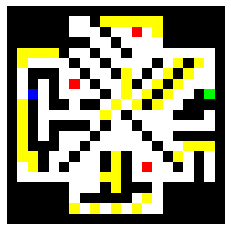

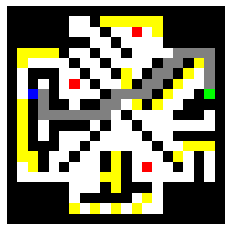

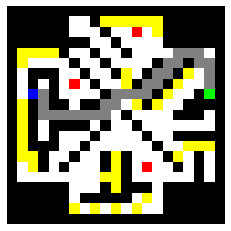

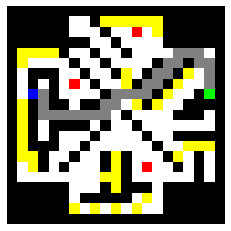

In [5]:
from pac_man.search import best_first_graph_search, uniform_cost_search
from pac_man.pacman_problem import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

def h_1(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-1
    return d

def h_2(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_3
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_1(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_2(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

At last, in this example, no matter the heuristic, a star and greedy bfs did not perform a change in their path. The only difference amongst them is that a star found the optimal path, while greedy bfs found a path.

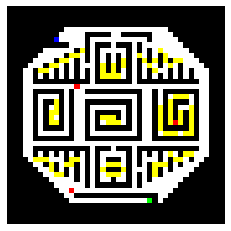

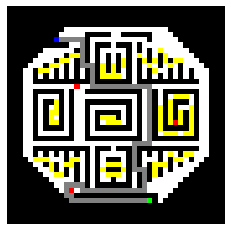

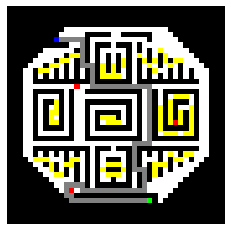

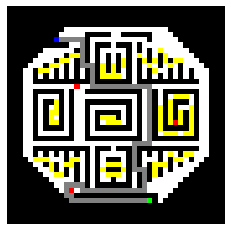

In [6]:
from pac_man.search import best_first_graph_search, uniform_cost_search
from pac_man.pacman_problem import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

def h_1(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-1
    return d

def h_2(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_5
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_1(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_2(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())